In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Load the dataset
# You will need to download 'Churn_Modelling.csv' from the Kaggle link and place it in your project folder.
df = pd.read_csv('data/Churn_Modelling.csv')

# Initial exploration
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1   

In [3]:
# Drop irrelevant columns that don't help with prediction
df_processed = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Use one-hot encoding to convert categorical columns to numbers
df_processed = pd.get_dummies(df_processed, columns=['Geography', 'Gender'], drop_first=True)

# Separate the data into features (X) and the target (y)
X = df_processed.drop('Exited', axis=1)
y = df_processed['Exited']

# Display the first few rows of the new feature matrix X to see the result
print("Preprocessed Features (X):")
print(X.head())

Preprocessed Features (X):
   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0               1        101348.88              False            False   
1               1        112542.58              False             True   
2               0        113931.57              False            False   
3               0         93826.63              False            False   
4               1         79084.10              False             True   

   Gender_Male  
0        False  
1        False  
2        False  
3        False  
4        False  


In [4]:
# Import the tools we'll need
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np

# Define a range of k values to test
k_range = range(1, 31)
k_scores = []

# Loop through each k in the range
for k in k_range:
    # A pipeline is a professional way to chain steps. 
    # Here, it first scales the data, then applies the k-NN model.
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    
    # We use StratifiedKFold to ensure class balance in each fold.
    # n_splits=10 is a common choice.
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    # cross_val_score runs the entire CV process for us.
    # It trains and tests the pipeline 10 times.
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    
    # We store the average accuracy from the 10 folds.
    k_scores.append(scores.mean())

# Print the results for the first 5 values of k to check our work
for k, score in zip(k_range[:5], k_scores[:5]):
    print(f'k={k}, Average Accuracy={score:.4f}')

k=1, Average Accuracy=0.7953
k=2, Average Accuracy=0.8256
k=3, Average Accuracy=0.8221
k=4, Average Accuracy=0.8297
k=5, Average Accuracy=0.8284


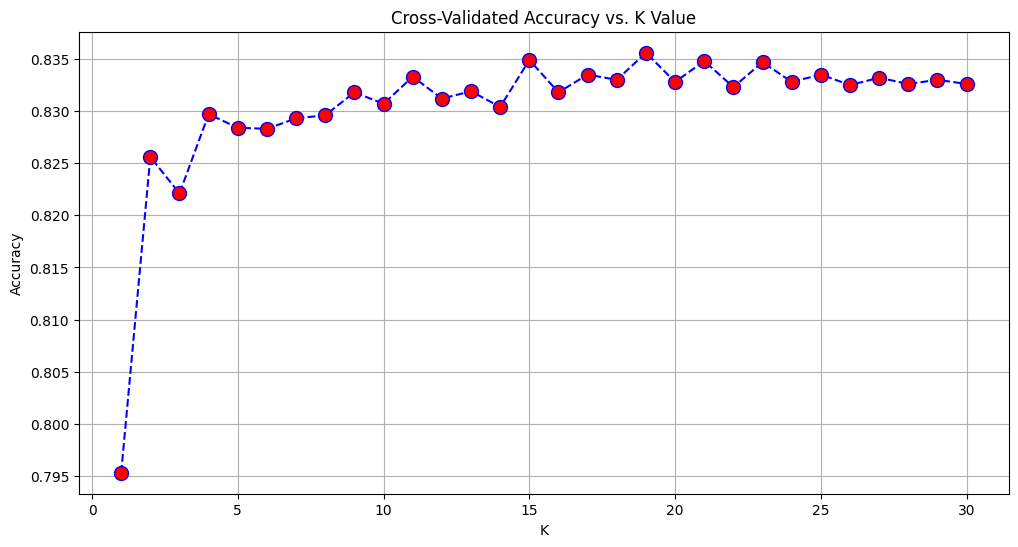

In [5]:
import matplotlib.pyplot as plt

# Plot the relationship between k and the cross-validated accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
         
plt.title('Cross-Validated Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()